# IMPLEMENTACIÓN  SUPPORT VECTOR REGRESSION

En este notebook se encuentra la implementación del algoritmo Support Vector Regeresion con el objetivo de estimar el precio de vehículos usados a partir de ciertas características.

### Importamos librerias necesarias

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt

### Leemos los datos y los convertimos a un numpy array para poder utilizar la libreria de Sklearn

In [11]:
#Leer datos
X_train = pd.read_excel("X_train.xlsx")
X_train = X_train.iloc[: , 1:]

Y_train=pd.read_excel("y_train.xlsx")
Y_train = Y_train.iloc[: , 1:]

X_test = pd.read_excel("X_test.xlsx")
X_test = X_test.iloc[: , 1:]

Y_test = pd.read_excel("y_test.xlsx")
Y_test = Y_test.iloc[: , 1:]

In [12]:
#convertirnos los datos de train a un arreglo de numpy 
X_train=X_train.to_numpy().reshape(-1,40)
Y_train=Y_train.to_numpy().reshape(1,-1)
Y_train=Y_train[0]

In [13]:
#convertirnos los datos de test a un arreglo de numpy 
X_test=X_test.to_numpy().reshape(-1,40)
Y_test=Y_test.to_numpy().reshape(1,-1)
Y_test=Y_test[0]

### A continuación se implementan funciones para calcular el R2, RMSE y el MAPE  

In [20]:
#se calcula el r2 dado un conjunto de datos reales y sus respectivas predicciones
def calculateR2(real,pred):
    mu=np.mean(real)
    numerator=np.sum(np.square(np.subtract(real,pred)))
    denominator=np.sum(np.square(np.subtract(real,mu)))
    R2=1-np.divide(numerator,denominator)
    return R2

In [22]:
#se calcula el RMSE dado un conjunto de datos reales y sus respectivas predicciones
def calculateRMSE(real,pred):
    N=pred.size
    RMSE=math.sqrt(np.square(np.subtract(real,pred)).mean())
    return RMSE

In [23]:
#se calcula el MAPE dado un conjunto de datos reales y sus respectivas predicciones
def calculateMAPE(real,pred):
    N=pred.size
    MAPE = np.mean(np.abs((real - pred)/real))*100
    return MAPE

In [24]:
#se llaman las funciones para calcular todas las metricas tanto en train como en test
def SVRGetMetrics(Y_pred_train,Y_pred_test):
    #conjunto train
    R2train=calculateR2(Y_train,Y_pred_train)
    RMSEtrain=calculateRMSE(Y_train,Y_pred_train)
    MAPEtrain=calculateMAPE(Y_train,Y_pred_train)
    print('El R2 en train es: ',R2train)
    print('El RMSE en train es: ',RMSEtrain)
    print('El MAPE en train es: ' ,MAPEtrain)
    #conjunto test
    R2test=calculateR2(Y_test,Y_pred_test)
    RMSEtest=calculateRMSE(Y_test,Y_pred_test)
    MAPEtest=calculateMAPE(Y_test,Y_pred_test)
    print('El R2 en test es: ',R2test)
    print('El RMSE en test es: ',RMSEtest)
    print('El MAPE en test es: ',MAPEtest)
    return [R2train,RMSEtrain,MAPEtrain,R2test,RMSEtest,MAPEtest]

### A continuación se entrenaran varios modelos utilizando el algoritmo de  support vector regression  y se hallara el $R^2$, RMSE Y MAPE para el conjunto test y train de cada modelo entrenado

### Modelo 1: kernel=rbf

In [25]:
svr_rbf = SVR(kernel = 'rbf')
svr_rbf.fit(X_train, Y_train)
Y_pred_train = svr_rbf.predict(X_train)
Y_pred_test = svr_rbf.predict(X_test)
SVRGetMetrics(Y_pred_train,Y_pred_test)

El R2 en train es:  -0.05575156034086204
El RMSE en train es:  38648145.850834936
El MAPE en train es:  50.166132875997114
El R2 en test es:  -0.044096981175094196
El RMSE en test es:  37906237.1319062
El MAPE en test es:  53.405777773707065


[-0.05575156034086204,
 38648145.850834936,
 50.166132875997114,
 -0.044096981175094196,
 37906237.1319062,
 53.405777773707065]

### Modelo 2: kernel=sigmoid

In [88]:
svr_sigmoid = SVR(kernel = 'sigmoid')
svr_sigmoid.fit(X_train, Y_train)
Y_pred_train = svr_sigmoid.predict(X_train)
Y_pred_test = svr_sigmoid.predict(X_test)
SVRGetMetrics(Y_pred_train,Y_pred_test)

El R2 en train es:  -0.0557549244554445
El RMSE en train es:  38648207.42625303
El MAPE en train es:  50.16630614823655
El R2 en test es:  -0.04410025630652048
El RMSE en test es:  37906296.5841474
El MAPE en test es:  53.40596355904058


[-0.0557549244554445,
 38648207.42625303,
 50.16630614823655,
 -0.04410025630652048,
 37906296.5841474,
 53.40596355904058]

### Modelo 3:  kernel=linear

In [75]:
svr_lin = SVR(kernel="linear")
svr_lin.fit(X_train, Y_train)
Y_pred_train = svr_lin.predict(X_train)
Y_pred_test = svr_lin.predict(X_test)
SVRGetMetrics(Y_pred_train,Y_pred_test)

El R2 en train es:  0.33131064066269766
El RMSE en train es:  30758135.348121263
El MAPE en train es:  35.932992034671024
El R2 en test es:  0.3394194511666615
El RMSE en test es:  30151098.9400618
El MAPE en test es:  36.32004730104168


### Modelos:  kernel=polinomico y variación en el grado del polonomio

#### Ahora se dejará fijo el Kernel polinómico y se va a variar el grado del polinomio para ver los resultados obtenidos para cada modelo entrenado y analizar como el grado del polinomio afecta los resultados

In [26]:
degree=2
allMetrics=[]
degrees=[]
while degree<=11:
    degrees.append(degree)
    svr_poly = SVR(kernel = 'poly',degree=degree,max_iter=1000000000)
    svr_poly.fit(X_train, Y_train)
    Y_pred_train = svr_poly.predict(X_train)
    Y_pred_test = svr_poly.predict(X_test)
    metrics=SVRGetMetrics(Y_pred_train,Y_pred_test)
    allMetrics.append(metrics)
    degree=degree+1
    print(degree)

El R2 en train es:  -0.05572115713615289
El RMSE en train es:  38647589.35819324
El MAPE en train es:  50.16332354851851
El R2 en test es:  -0.044065385615587704
El RMSE en test es:  37905663.58469104
El MAPE en test es:  53.40252089196411
3
El R2 en train es:  -0.055631937006645815
El RMSE en train es:  38645956.24903415
El MAPE en train es:  50.15180457080578
El R2 en test es:  -0.04396085506999503
El RMSE en test es:  37903766.00292544
El MAPE en test es:  53.388351522325515
4
El R2 en train es:  -0.055869709021595826
El RMSE en train es:  38650308.3386174
El MAPE en train es:  50.13950243707884
El R2 en test es:  -0.04391476843070441
El RMSE en test es:  37902929.34489241
El MAPE en test es:  53.3692387654997
5
El R2 en train es:  -0.05575693423976902
El RMSE en train es:  38648244.21250081
El MAPE en train es:  50.166357781315064
El R2 en test es:  -0.04410761162794685
El RMSE en test es:  37906430.10221846
El MAPE en test es:  53.40632970547047
6
El R2 en train es:  -0.0557548932

/Users/susanaalvarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


El R2 en train es:  -2.8154518629864462
El RMSE en train es:  73471818.09624828
El MAPE en train es:  82.91953112591374
El R2 en test es:  -2.7959276739973205
El RMSE en test es:  72276850.47690678
El MAPE en test es:  82.80742683610355
8


/Users/susanaalvarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


El R2 en train es:  -0.054205767183359566
El RMSE en train es:  38619841.879660614
El MAPE en train es:  50.313392959706704
El R2 en test es:  -0.0421078294015611
El RMSE en test es:  37870111.557877675
El MAPE en test es:  53.548017939706774
9


/Users/susanaalvarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


El R2 en train es:  -9.127033551835027
El RMSE en train es:  119698558.92182033
El MAPE en train es:  44.97408324067879
El R2 en test es:  -0.49859655028118044
El RMSE en test es:  45413253.76845262
El MAPE en test es:  44.31554709607398
10


/Users/susanaalvarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


El R2 en train es:  -2.8162977211678317
El RMSE en train es:  73479961.73122
El MAPE en train es:  44.556002014867715
El R2 en test es:  -0.40119716303684383
El RMSE en test es:  43912673.6049403
El MAPE en test es:  44.817912527899374
11


/Users/susanaalvarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


El R2 en train es:  -32489115453.631416
El RMSE en train es:  6779797791658.73
El MAPE en train es:  11932838.0044214
El R2 en test es:  -29907783839.134968
El RMSE en test es:  6415527510633.508
El MAPE en test es:  12284157.409271691
12


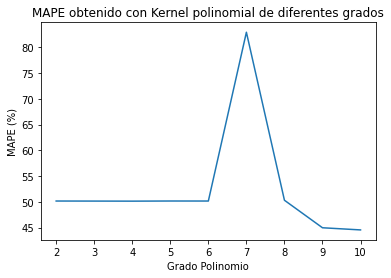

In [62]:
#graficar los resultados del MAPE obteindo en train con cada modelo entrenado
MAPES=map(lambda metrics:metrics[2], allMetrics)
MAPES=list(MAPES)
plt.plot(degrees[0:-2],MAPES[0:-2])
plt.xlabel('Grado Polinomio')
plt.ylabel('MAPE (%)')
plt.title('MAPE obtenido con Kernel polinomial de diferentes grados')
plt.show()

#### Ahora se dejará fijo el Kernel polinómico y se va a variar el grado del polinomio para ver los resultados obtenidos para cada modelo entrenado y analizar como el grado del polinomio afecta los resultados

### Modelos:  kernel=lineal y variación en hiper parametro c

#### Ahora se dejara fijo el Kernel lineal y se va a variar el hiper parámetro C para ver esto como influye en los resultados presentados por el modelo 

In [28]:
C=0.1
allMetricsLinear=[]
degrees=[]
cValues=[]
while C<=1000:
    cValues.append(C)
    svr_lin = SVR(kernel = 'linear',C=C,max_iter=1000000000)
    svr_lin.fit(X_train, Y_train)
    Y_pred_train = svr_lin.predict(X_train)
    Y_pred_test = svr_lin.predict(X_test)
    metrics=SVRGetMetrics(Y_pred_train,Y_pred_test)
    allMetricsLinear.append(metrics)
    C=C*10
    print(C)

El R2 en train es:  0.33154618415636905
El RMSE en train es:  30752717.64805939
El MAPE en train es:  35.67505713357341
El R2 en test es:  0.3381383243685375
El RMSE en test es:  30180322.227526225
El MAPE en test es:  36.240926755422656
1.0
El R2 en train es:  0.33131064066269766
El RMSE en train es:  30758135.348121263
El MAPE en train es:  35.932992034671024
El R2 en test es:  0.3394194511666615
El RMSE en test es:  30151098.9400618
El MAPE en test es:  36.32004730104168
10.0


/Users/susanaalvarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


El R2 en train es:  0.330819890970357
El RMSE en train es:  30769419.942978688
El MAPE en train es:  35.24823210134018
El R2 en test es:  0.3403498300990645
El RMSE en test es:  30129858.66018361
El MAPE en test es:  35.56011248203548
100.0


/Users/susanaalvarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


El R2 en train es:  0.2978918775518886
El RMSE en train es:  31517357.366058573
El MAPE en train es:  31.92317489892451
El R2 en test es:  0.31037253406057486
El RMSE en test es:  30806866.74395647
El MAPE en test es:  32.13367965000779
1000.0


/Users/susanaalvarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


El R2 en train es:  0.3868536289655927
El RMSE en train es:  29453023.136083573
El MAPE en train es:  35.578085958955306
El R2 en test es:  0.3688887956269048
El RMSE en test es:  29470886.53024777
El MAPE en test es:  36.654076509067934
10000.0


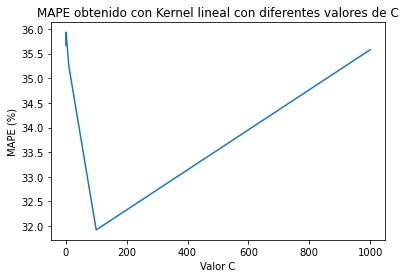

In [30]:
#graficar los resultados del MAPE en train obtenido con cada modelo 
MAPESLinear=map(lambda metrics:metrics[2], allMetricsLinear)
MAPESLinear=list(MAPESLinear)
plt.plot(cValues,MAPESLinear)
plt.xlabel('Valor C')
plt.ylabel('MAPE (%)')
plt.title('MAPE obtenido con Kernel lineal con diferentes valores de C')
plt.show()

### Modelos:  kernel=lineal, C=100 y variación en hiper parametro $\epsilon$

#### Ahora se dejara fijo el Kernel lineal y C=100 y se va a variar el hiper parámetro $\epsilon$ para ver esto como influye en los resultados presentados por el modelo

In [31]:
allMetricsLinear=[]
degrees=[]
epsilonValues=[]
epsilon=1
while epsilon>=0.000001:
    epsilonValues.append(epsilon)
    svr_lin = SVR(kernel = 'linear',C=100,epsilon=epsilon,max_iter=1000000000)
    svr_lin.fit(X_train, Y_train)
    Y_pred_train = svr_lin.predict(X_train)
    Y_pred_test = svr_lin.predict(X_test)
    metrics=SVRGetMetrics(Y_pred_train,Y_pred_test)
    allMetricsLinear.append(metrics)
    epsilon=epsilon/10
    print(epsilon)

/Users/susanaalvarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


El R2 en train es:  0.18464055872266416
El RMSE en train es:  33964275.081776
El MAPE en train es:  33.088653016287665
El R2 en test es:  0.20367447579872666
El RMSE en test es:  33104388.736159828
El MAPE en test es:  32.801980164838824
0.1


/Users/susanaalvarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


El R2 en train es:  0.2978918775518886
El RMSE en train es:  31517357.366058573
El MAPE en train es:  31.92317489892451
El R2 en test es:  0.31037253406057486
El RMSE en test es:  30806866.74395647
El MAPE en test es:  32.13367965000779
0.01


/Users/susanaalvarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


El R2 en train es:  0.30369106207423224
El RMSE en train es:  31386925.921553317
El MAPE en train es:  32.132387079221104
El R2 en test es:  0.3170105298657201
El RMSE en test es:  30658242.785577066
El MAPE en test es:  32.328996808309064
0.001


/Users/susanaalvarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


El R2 en train es:  0.29660523819762785
El RMSE en train es:  31546222.515182097
El MAPE en train es:  31.893181792679226
El R2 en test es:  0.30887511374356824
El RMSE en test es:  30840294.80192084
El MAPE en test es:  32.09942176521614
0.0001


/Users/susanaalvarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


El R2 en train es:  0.305286052439501
El RMSE en train es:  31350957.299753375
El MAPE en train es:  31.913715877555966
El R2 en test es:  0.31679090654511866
El RMSE en test es:  30663171.64918009
El MAPE en test es:  32.1746094636962
1e-05


/Users/susanaalvarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


El R2 en train es:  0.2998226424411531
El RMSE en train es:  31473991.894171875
El MAPE en train es:  31.85363451738005
El R2 en test es:  0.31154932340757924
El RMSE en test es:  30780570.900671158
El MAPE en test es:  32.0925083896074
1.0000000000000002e-06


/Users/susanaalvarez/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


El R2 en train es:  0.3289128017519365
El RMSE en train es:  30813233.46927056
El MAPE en train es:  32.21525165923732
El R2 en test es:  0.3393355262097124
El RMSE en test es:  30153014.18667256
El MAPE en test es:  32.57419555431421
1.0000000000000002e-07


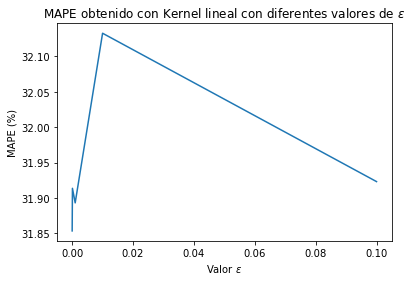

In [32]:
#graficar los resultados del MAPE en train obtenido con cada modelo 
MAPESLinear=map(lambda metrics:metrics[2], allMetricsLinear)
MAPESLinear=list(MAPESLinear)
plt.plot(epsilonValues[1:-1],MAPESLinear[1:-1])
plt.xlabel('Valor $\epsilon$')
plt.ylabel('MAPE (%)')
plt.title('MAPE obtenido con Kernel lineal con diferentes valores de $\epsilon$')
plt.show()